# <font color = 'teal'>PROJECT II - DATA WRANGLING</font>
***

## <font color = 'teal'>Analyzed by Glory Edamkue</font>
***

This project seeks to analyze the dataset from the Twitter account @WeRateDogs. Features of tweets such as retweet counts, favorite counts, images, tweet ids, tweet texts/ ratings, were used to draw conclusions.

Here are the steps and analyses involved in my dataset.

### <font color = 'teal'>Creating the Environment<font>
***

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
from time import time

In [2]:
import requests
import tweepy
import json
import getpass
import matplotlib.pyplot as plt
%matplotlib inline

### <font color = 'teal'>Step 1: Gathering Data<font>

***

#### I. Reading from file on hand (the enhanced Twitter archive)

In [3]:
enhanced = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### II. Use the Requests library to download the tweet image prediction

In [ ]:
# Making use of the rquests library to query the url we were given from the classroom
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [ ]:
# I only want to download directly into my directory because I know
# It is the only time I will be downloading it and it is the only copy I want
if not os.path.exists('image_predictions.tsv'):
    with open('image_predictions.tsv', mode = 'wb') as file:
        file.write(response.content)   

In [5]:
predict = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### III. Use the Tweepy library to query additional data via the Twitter API

In [ ]:
#  Twitter authentication block
consumer_key = getpass.getpass('consumer_key')
consumer_secret = getpass.getpass('consumer_secret')
access_token = getpass.getpass('access_token')
access_secret = getpass.getpass('access_secret')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

The Twitter query will be joined on the `enhanced` dataframe `tweet_id`s.

In [ ]:
# I am going to leverage the API query on the tweet ids in the enhanced twitter archive
# Then I will time each twwet
# Then I will append each tweet to a text file in my current directory called `tweets_json.txt`
# I will then dump each tweets JSON data into that text file 
# Any errors that come up will be printed out
for tweeet_id in  enhanced.tweet_id:
    try:
        time_start= time()
        tweet = api.get_status(tweeet_id, tweet_mode= 'extended')
        end_time = time()
        print(end_time - time_start)
        #print(tweet._json)
        with open('tweets_json.txt', 'a') as ff:
            ff.write(json.dumps(tweet._json))
            ff.write('\n')
    except Exception as err:
        print(str(err)) 

In [7]:
# I will open the text file to retrieve each tweets info from it
# Then I will read each line of the file as `json_data'. Each of these lines represents a tweet row of data
# Then I will write each tweet as a separate line into a pandas dataframe after selecting the JSON array items I want
# I have decided to call each read line `each_tweet` from the data
with open('tweets_json.txt', encoding='utf-8') as json_file:
#   Creating a dataframe that will eventually hold this info
    api_tweets = pd.DataFrame(columns = ('tweet_id','favorite_count','retweet_count'))
    json_data = json_file.readlines()
    for each_tweet in json_data:
        each_tweet = json.loads(each_tweet)
#         I want to take the entire index of tweets, and the only info I want from them are the ids, favorite counts and retweet counts
        api_tweets.loc[len(api_tweets.index)] = [each_tweet['id'], each_tweet['favorite_count'], each_tweet['retweet_count']]

In [8]:
api_tweets

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33855,7021
1,892177421306343426,29360,5304
2,891815181378084864,22076,3487
3,891689557279858688,36971,7234
4,891327558926688256,35346,7773
...,...,...,...
2322,666049248165822465,89,37
2323,666044226329800704,247,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


### <font color = 'teal'>Step 2: Assessing Data<font>
***

Note: pay attention to the following key points when you access the data.

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. ie. `enhanced tweet ids in predict tweet_ids`
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### Assessing the Data Sets Visually

I assessed the 3 datasets in their raw file forms using Excel as the document viewer

#### Assessing the `Enhanced` DafaFrame Programmatically

In [9]:
enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
enhanced.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [14]:
enhanced.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495...,13,10,None,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
159,860981674716409858,NaN,NaN,2017-05-06 22:16:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lorenzo. He's an avid nift...,8.605638e+17,4.196984e+09,2017-05-05 18:36:06 +0000,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None


In [15]:
enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'in_reply_to_status_id'}>,
        <AxesSubplot:title={'center':'in_reply_to_user_id'}>],
       [<AxesSubplot:title={'center':'retweeted_status_id'}>,
        <AxesSubplot:title={'center':'retweeted_status_user_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>],
       [<AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

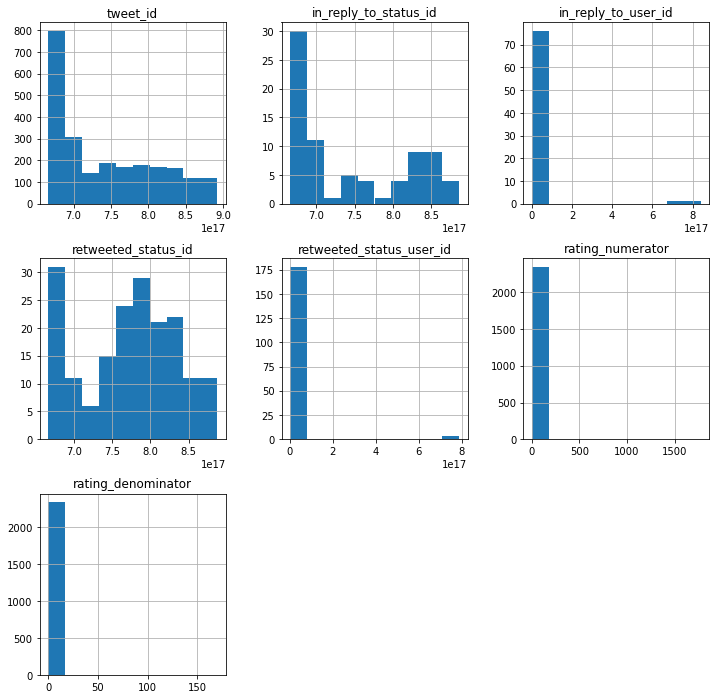

In [16]:
enhanced.hist(figsize = (12, 12))

#### Assessing the` Predict` DataFrame Programmatically

In [17]:
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
predict.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [22]:
predict.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

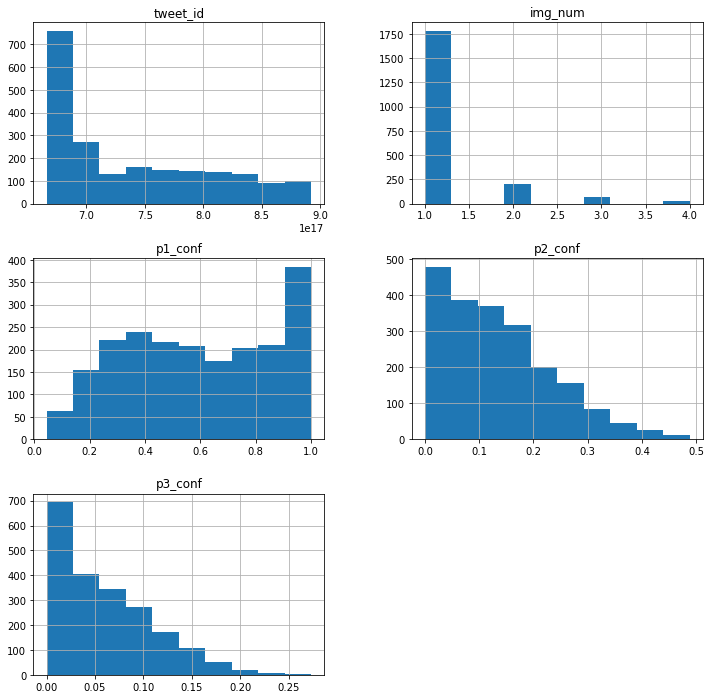

In [23]:
predict.hist(figsize = (12, 12));

In [24]:
predict.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1889,848324959059550208,https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg,1,malamute,0.544576,True,Siberian_husky,0.290268,True,Eskimo_dog,0.154421,True
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


#### Assessing the `API_Tweet` DataFrame Programmatically

In [25]:
api_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33855,7021
1,892177421306343426,29360,5304
2,891815181378084864,22076,3487
3,891689557279858688,36971,7234
4,891327558926688256,35346,7773


In [26]:
api_tweets.tail()

,tweet_id,favorite_count,retweet_count
2322,666049248165822465,89,37
2323,666044226329800704,247,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39
2326,666020888022790149,2293,423


In [27]:
api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   object
 2   retweet_count   2327 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [28]:
api_tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2327,2327,2327
unique,2327,1979,1658
top,892420643555336193,0,50
freq,1,160,6


In [29]:
api_tweets.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [30]:
api_tweets.nunique()

tweet_id          2327
favorite_count    1979
retweet_count     1658
dtype: int64

In [31]:
api_tweets.sample(20)

,tweet_id,favorite_count,retweet_count
2202,668226093875376128,247,84
1356,700796979434098688,2263,866
2156,668986018524233728,479,140
437,818307523543449600,0,7479
1656,681679526984871937,1630,401
2096,670361874861563904,290,56
1172,716730379797970944,1138,397
1028,742161199639494656,4010,1249
1844,675145476954566656,1919,786
957,749075273010798592,5381,1895




#### Tidiness Issues

1. The columns `'doggo'`,	`'floofer'`,	`'pupper'`,	`'puppo'` are better organized into one column to prevent needless columns. 


2. Merging the `enhanced` DataFrame to the `predict` and `api_tweets` DataFrames to reduce the number of tables, as they share the same information in the column `'tweet_id'`.


#### Quality Issues

1. According to the above cell's guideline number 1, there are some rows that do not fulfill the `no retweet` condition. They need to be found out and expunged as they have nothing to do with the dataset to be analyzed.It would also be good to remove replies that have ratings, as those will not be original ratings.


2.  I need to change the data type of several columns:The `timestamp` column of the `enhanced` table is an object, and not a datetime data type. Changing the `rating_numerator` and `rating_denominator` columns to float64 datatype.`tweet_id` should be in a string (object) and not an integer. `retweet_count` and `favorite_count` should be integer columns.


3. The `rating_numerator` column of the `enhanced` table has a maximum value of _1776_. It is impossible, and clearly an outlier error in the data set. An accuracy error.


4. The `'rating_denominator'` column of the `enhanced` table has a maximum value of _170_. It is impossible, and clearly an outlier error in the dataset. The only denominator in the schema is 10. An accuracy error.
 
 
5. Some dogs have entries in more than one stage. I will try to clean that up logically or simply remove them from the dataset because they don't follow the schema.


6. These are good dogs, Brent. And that's why they should not have a rating of 0, rather a rating of 10 seems more logical. I will assume that is a typo.


7. There are some decimal dog ratings which need to be extracted.


8.  Dropping all needless columns in the dataset.


9. Remove all needless rows fro, the master table
. 
This coincides with tidiness issue one. I changed all NaN values in the dog age columns to empty ones and went on to concatenate them.



### <font color = 'teal'>Step 3: Cleaning Data<font>
***
    

###  <font color = 'teal'>Creating copies of the 3 DataFrames</font>

In [32]:
# For the `enhanced` DataFrame 
enhanced_clean = enhanced.copy()
# For the `predict` DataFrame
predict_clean = predict.copy()
# For 'api_tweets' DataFrame
api_tweets_clean = api_tweets.copy()

#### <font color = 'black'>Issue 1 Tidiness</font>

##### Define

There is the need to unite the columns in the dog ages so that there is just one column handling all that information in line with **tidiness** principles. I will string concatenate the columns into one in the `enhanced_clean` dataframe, have a 
look at the dataframe and see if it meets up with what is expected.

I will do that first by converting the string "None" into the np.nan value NaN. Then I will fill them so that those cells are empty. And finally, I will apply string concatenation to create one column. Then delete the now needless `doggo`, `floofer`, `puppo`, and `pupper` columns.

##### Code

In [33]:
# Making every None entry in the dataframe become a NaN entry 
enhanced_clean.replace("None", np.nan, inplace = True)

In [34]:
# Converting each of the now NaN entries in the below mentioned columns into empty columns (i.e. '') so that when 
# Concatenating they will not have 'NaNNaNNaNFloofer', but rather have 'Floofer'
enhanced_clean[['puppo', 'pupper', 'doggo', 'floofer']] = enhanced_clean[['puppo', 'pupper', 'doggo', 'floofer']].fillna('')

In [35]:
# Creating a new column whose entries will be a concatenation of all the dog stages
enhanced_clean['dog_ages'] = enhanced_clean['puppo'] + enhanced_clean['pupper'] + enhanced_clean['doggo'] + enhanced_clean['floofer']

In [36]:
# I am dropping the four columns that were concatenated since there is now one column that represents all entries logically
enhanced_clean.drop(['puppo', 'pupper', 'floofer', 'doggo', 'name'], axis = 1, inplace = True)

##### Test

In [37]:
enhanced_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_ages
2203,668641109086707712,NaN,NaN,2015-11-23 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hanz. He heard some thunder. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668641109...,10,10,
1907,674447403907457024,NaN,NaN,2015-12-09 04:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants a belly rub. This puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403...,10,10,pupper
1752,678969228704284672,NaN,NaN,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678969228...,11,10,
1177,719704490224398336,NaN,NaN,2016-04-12 01:51:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719704490...,12,10,pupper
1943,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,12,10,
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,puppo
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554...,11,10,pupper
1262,710140971284037632,NaN,NaN,2016-03-16 16:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tater. His underbite is fierce af. Doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710140971...,8,10,


In [38]:
# I still want to be sure of that
enhanced_clean['dog_ages'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
pupperdoggo       12
floofer            9
puppodoggo         1
doggofloofer       1
Name: dog_ages, dtype: int64

> The above has shown me a quality issue which I will deal with shortly.

#### <font color = 'black'>Issue 2 Tidiness</font>

##### Define



In order to complete the first guideline on cleaning the data:

   " <font color = 'cerulean'>**You only want original ratings (no retweets) that have images.**</font> "

there is one more thing I need to do.


I will merge the `enhanced_clean` dataframe to the `predict_clean`, right join them on the `tweet_ids` column and create another dataframe out of them, in order to get only the tweets that have images. This will improve the quality of the data under cleaning.

I will also delete the `expanded_urls` column from the `enhanced_clean` table. It will serve no purpose in my analysis.

The API downloaded tweets have been excluded from the merges, but they will provide valuaable insight in my analysis. Thus I will merge them to the `enhanced_clean` dataframe so that I can have them all in one place. That is one tidiness issue solved.

##### Code

In [39]:
# Merging the enhanced_clean dataframe with the predicts dataframe first
enhanced_clean = pd.merge(enhanced_clean, predict_clean,
                            on=['tweet_id'], how='right')

In [40]:
# Dropping a column I already know I will not analyze
enhanced_clean.drop(['expanded_urls'], axis = 1, inplace = True)

In [41]:
# Merging the enhanced_clean dataframe second
enhanced_clean = pd.merge(enhanced_clean, api_tweets_clean,
                            on=['tweet_id'], how='left')

##### Test

In [42]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   rating_numerator            2075 non-null   int64  
 10  rating_denominator          2075 non-null   int64  
 11  dog_ages                    2075 non-null   object 
 12  jpg_url                     2075 non-null   object 
 13  img_num                     2075 

#### <font color = 'black'>Issue 1 Quality</font>

##### Define
From the assessing Data guideline: **You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.**

I need to separate the data that have only original ratings and also have images. I will do that from the `enhanced` dataframe as it is the only dataframe that holds such information.

First, I will search out Retweets and Replies to original posts. From the Visual Assessment I realized that the distinction between original post, replies and retweets lies in the `text` column. Retweets start with '**RT @**' and replies start with '**@**'. They can be isolated with regex.

##### Code

In [43]:
# To find all retweets, in the text column, they start with `RT @` 
#  I can retrieve them with regex and drop them
enhanced_clean[enhanced_clean['text'].str.contains('(^RT\s)@.')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/4218028493.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean[enhanced_clean['text'].str.contains('(^RT\s)@.')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
94,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,5,...,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False,0,26
95,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,12,...,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,0,29
1037,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,12,...,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False,0,122
1297,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,13,...,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,0,14932
1315,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,11,...,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False,0,7260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,13,...,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,0,101
1992,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,14,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,NaN,NaN
2006,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,14,...,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,0,70
2041,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,13,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,0,15454


In [44]:
# To identify all replies in the text column, they start with `@`
#  I can retrieve them with regex and drop them
enhanced_clean[enhanced_clean['text'].str.contains('(^@).')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/2627695478.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean[enhanced_clean['text'].str.contains('(^@).')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [45]:
# Recreating the enhanced_clean dataframe to exclude all text entries that are replies from their rows
enhanced_clean = enhanced_clean[~enhanced_clean['text'].str.contains('(^@).')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/1139586976.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean = enhanced_clean[~enhanced_clean['text'].str.contains('(^@).')]


In [46]:
# Recreating the enhanced_clean dataframe to exclude all rewteeted entries from their rows
enhanced_clean = enhanced_clean[~enhanced_clean['text'].str.contains('(^RT\s)@.')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/469022323.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean = enhanced_clean[~enhanced_clean['text'].str.contains('(^RT\s)@.')]


##### Test

In [47]:
# Are there still rows with replies? 
enhanced_clean[enhanced_clean['text'].str.contains('(^@).')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/3446101292.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean[enhanced_clean['text'].str.contains('(^@).')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [48]:
#  Are there stil rows with retweets? 
enhanced_clean[enhanced_clean['text'].str.contains('(^RT\s)@.')]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/4135135207.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean[enhanced_clean['text'].str.contains('(^RT\s)@.')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [49]:
#  Let us check yet again if the changes have been effected and if the tests are correct so far
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1994 non-null   int64  
 10  rating_denominator          1994 non-null   int64  
 11  dog_ages                    1994 non-null   object 
 12  jpg_url                     1994 non-null   object 
 13  img_num                     1994 

> It seems to have worked on all retweeted statuses, but 55 replies have gone unnoticed and are still present in the dataframe. I will use the query method to eliminate them, as regex will not serve me well here. 

##### Re - Define

I will use the exclusivity of replied tweets having entries in the `in_reply_to_status_id` and `in_reply_to_user_id ` as criteria for the query. They appear to have entries in the same lines, but after this code I will know if that is true.

#####  Re - Code

In [50]:
# I will drop any column that is not a NaN and has an actual entry in a reply column because that means it is a reply
enhanced_clean.drop(enhanced_clean.query('in_reply_to_user_id == in_reply_to_user_id').index, axis = 0, inplace = True)

##### Re - Test

In [51]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1971 non-null   int64  
 10  rating_denominator          1971 non-null   int64  
 11  dog_ages                    1971 non-null   object 
 12  jpg_url                     1971 non-null   object 
 13  img_num                     1971 

#### <font color = 'black'>Issue 2 Quality</font>

##### Define

Making the `timestamp` column a datetime64 object will help make the column ready for use to find out if there are any original tweets from after the 17th of August 2017 in the newly-formed dataset. Also, I feel its name is ambiguous and might call the timestamp method when used for analysis.

I will change the name of the column, as well as changing its data type to datetime64.

Then I will change the datatype of some other columns. `tweet_id` to object, `rating_numerator` and `rating_denominator` to float64, `retweet and faorite` count to integer64.

##### Code

In [52]:
# Renaming the timestammp column
enhanced_clean.rename(columns={'timestamp' : 'tweet_occur'}, inplace = True)

In [53]:
# Changing the renamed timestamp column, tweet_occur to datetime64
enhanced_clean['tweet_occur'] = pd.to_datetime(enhanced_clean['tweet_occur'])

In [54]:
# Changing the rating numerator values to floats so that it will include NaNs
enhanced_clean['rating_numerator'] = pd.to_numeric(enhanced_clean['rating_numerator']).fillna(0).astype(np.float64)

In [55]:
enhanced_clean['rating_numerator'].astype(np.float64)

0        8.0
1        7.0
2        9.0
3        6.0
4        5.0
        ... 
2070    12.0
2071    13.0
2072    12.0
2073    13.0
2074    13.0
Name: rating_numerator, Length: 1971, dtype: float64

In [56]:
# Changing the rating denominator values to floats so that it will include NaNs
enhanced_clean['rating_denominator'] = pd.to_numeric(enhanced_clean['rating_denominator']).fillna(0).astype(np.float64)

In [57]:
enhanced_clean['rating_denominator'].astype(np.float64)

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2070    10.0
2071    10.0
2072    10.0
2073    10.0
2074    10.0
Name: rating_denominator, Length: 1971, dtype: float64

In [58]:
# # Changing the retweet count values to integers so that it will include NaNs
enhanced_clean['retweet_count'] = pd.to_numeric(enhanced_clean['retweet_count']).fillna(0).astype(np.int64)

In [59]:
enhanced_clean['retweet_count'].astype(np.int64)

0        423
1         39
2         36
3        115
4         37
        ... 
2070    7773
2071    7234
2072    3487
2073    5304
2074    7021
Name: retweet_count, Length: 1971, dtype: int64

In [60]:
# Changing the favorite tweet values to integers so that it will include NaNs
enhanced_clean['favorite_count'] = pd.to_numeric(enhanced_clean['favorite_count']).fillna(0).astype(np.int64)

In [61]:
enhanced_clean['favorite_count'].astype(np.int64)

0        2293
1         112
2         100
3         247
4          89
        ...  
2070    35346
2071    36971
2072    22076
2073    29360
2074    33855
Name: favorite_count, Length: 1971, dtype: int64

In [62]:
enhanced_clean['tweet_id'] = enhanced_clean['tweet_id'].astype(object)

##### Test

In [63]:
# The guideline says we will not have image predictions for dates beyond 17 August 2017, so I'll just make sure of that
enhanced_clean[enhanced_clean['tweet_occur'] >= "2017 08 17"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_occur,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [64]:
# Let me see how the datatypes have changed. If they are okay I will move to the next issue
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   tweet_occur                 1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   rating_numerator            1971 non-null   float64            
 10  rating_denominator          1971 non-null   float64         

#### <font color = 'black'>Issue 3 Quality</font>

##### Define

The numerator in the `rating_numerator` has a maximum value of 1776, which is impossible. Changing it is tasking, so I will limit the numerator rating to those less than 20. It is still a reasonable standard deviaton, and it is better than the 1776 massive outlier.

##### Code

In [65]:
enhanced_clean = enhanced_clean[enhanced_clean.rating_numerator <= 20]

##### Test

In [66]:
enhanced_clean[enhanced_clean.rating_numerator >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_occur,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [67]:
# A look at the maximum rating
enhanced_clean.rating_numerator.max()

14.0

In [68]:
# A look at the minimum rating
enhanced_clean.rating_numerator.min()

0.0

#### <font color = 'black'>Issue 4 Quality</font>

##### Define

The denominator value is always supposed to be 10. Anything other than that is an anomaly. I will assign every value in that column to `10`. That way the rating value is kept uniform.

##### Code

In [69]:
# Assigning a value to the denominator column
enhanced_clean = enhanced_clean.assign(rating_denominator = 10)

##### Test

In [70]:
enhanced_clean[enhanced_clean['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_occur,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [71]:
# A look at the maximum denominator
enhanced_clean.rating_denominator.max()

10

In [72]:
# A look at the minimum denominator
enhanced_clean.rating_denominator.min()

10

In [73]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1953 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   tweet_occur                 1953 non-null   datetime64[ns, UTC]
 4   source                      1953 non-null   object             
 5   text                        1953 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   rating_numerator            1953 non-null   float64            
 10  rating_denominator          1953 non-null   int64           

#### <font color = 'black'>Issue 5 Quality</font>

##### Define

There are some tweet entries with more than one dog age entry. I noticed that after concatenating the dog ages into one column and checking value counts in the tidiness issue 2. 

I will clean that up without deleting them or possibly defining what the tweeter meant. Maybe they are not as confused about the ratings they appear to be, and these dog of WeRateDogs can be many ages at once.

##### Code

In [74]:
# Recap of code in tidiness issue 2 that made me aware of this issue
enhanced_clean['dog_ages'].value_counts()

                1651
pupper           200
doggo             63
puppo             22
pupperdoggo        8
floofer            7
doggofloofer       1
puppodoggo         1
Name: dog_ages, dtype: int64

In [75]:
# Finding and separating the entries from each other so they are seen as 2 separate ages
enhanced_clean.loc[enhanced_clean.dog_ages == 'pupperdoggo', 'dog_ages'] = 'pupper, doggo'
enhanced_clean.loc[enhanced_clean.dog_ages == 'puppodoggo', 'dog_ages'] = 'puppo, doggo'
enhanced_clean.loc[enhanced_clean.dog_ages == 'doggofloofer', 'dog_ages'] = 'doggo, floofer'

In [77]:
# Looking for all empty dog age entries and making then NaNs so that empty entries wont interfere
enhanced_clean.loc[enhanced_clean.dog_ages == '', 'dog_ages'] = np.nan

##### Test

In [78]:
# Have the changes been effected?
enhanced_clean['dog_ages'].value_counts()

pupper            200
doggo              63
puppo              22
pupper, doggo       8
floofer             7
doggo, floofer      1
puppo, doggo        1
Name: dog_ages, dtype: int64

#### <font color = 'black'>Issue 6 Quality</font>

##### Define

It is wrong for any dog to be rated 0 according to the unique rating system of @WeRateDogs. Those 0s are likely 10s. If there are a negligible number of such values, less than 10% of the DafaFrame, I will drop those rows.

##### Code

In [79]:
enhanced_clean['rating_numerator'].value_counts(normalize = True)*100

12.0    22.836662
10.0    21.351767
11.0    20.071685
13.0    12.954429
9.0      7.680492
8.0      4.864311
7.0      2.662570
5.0      1.689708
14.0     1.689708
6.0      1.638505
3.0      0.972862
4.0      0.819252
2.0      0.460829
1.0      0.256016
0.0      0.051203
Name: rating_numerator, dtype: float64

In [80]:
# Around 0.05% of the values are 0. I have elected to delete those rows
enhanced_clean = enhanced_clean[enhanced_clean['rating_numerator'] != 0]

##### Test

In [81]:
# I want to see only entries greater than or equal to one, there are 1952 of those 
# so I know that it has been corrected with one row dropped where the numerator was equal to 0
enhanced_clean[enhanced_clean['rating_numerator'] >= 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_occur,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,8.0,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2293,423
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7.0,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,112,39
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,100,36
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,247,115
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5.0,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,89,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35346,7773
2071,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36971,7234
2072,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22076,3487
2073,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29360,5304


#### Issue 7 Quality

##### Define

Some of the dog ratings are decimals, and that has not reflected properly in the `rating_numerator` column. I am going to look over it again, and extract them if the need arises.

##### Code

In [ ]:
# I will find all dogs with such numerator ratings that do not reflect the decimals
enhanced_clean[enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

In [82]:
# There is only once such entry and I am going to drop it
enhanced_clean.drop([2033], axis = 0, inplace = True)

##### Test

In [83]:
enhanced_clean[enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\user\AppData\Local\Temp/ipykernel_4820/3866222353.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  enhanced_clean[enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator


#### <font color = 'black'>Issue 8 Quality</font>

##### Define

There are some columns that will need to be removed for tidiness reasons. They are the `source`, `timestamp`, `text` and `name` columns. Some are too incomplete for further analyses (`name`), while others have already been analyzed (`text`).

In [84]:
enhanced_clean.drop(['text', 'source', 'tweet_occur', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True, axis = 1)

##### Test

In [85]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1951 non-null   object 
 1   rating_numerator    1951 non-null   float64
 2   rating_denominator  1951 non-null   int64  
 3   dog_ages            302 non-null    object 
 4   jpg_url             1951 non-null   object 
 5   img_num             1951 non-null   int64  
 6   p1                  1951 non-null   object 
 7   p1_conf             1951 non-null   float64
 8   p1_dog              1951 non-null   bool   
 9   p2                  1951 non-null   object 
 10  p2_conf             1951 non-null   float64
 11  p2_dog              1951 non-null   bool   
 12  p3                  1951 non-null   object 
 13  p3_conf             1951 non-null   float64
 14  p3_dog              1951 non-null   bool   
 15  favorite_count      1951 non-null   int64  
 16  retwee

####  <font color = 'black'>Issue 9</font>

##### Define

According to tidiness principles, empty entries when they should hold something are not very good as they could affect the quality of the data. What I will do is work on eliminating null entries where possible with regard to the outcome of the analysis.

##### Code

In [86]:
enhanced_clean = enhanced_clean[pd.notnull(enhanced_clean['rating_numerator'])]

In [87]:
enhanced_clean = enhanced_clean[pd.notnull(enhanced_clean['rating_denominator'])]

In [88]:
enhanced_clean = enhanced_clean[pd.notnull(enhanced_clean['retweet_count'])]

In [89]:
enhanced_clean = enhanced_clean[pd.notnull(enhanced_clean['favorite_count'])]

##### Test

In [91]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1951 non-null   object 
 1   rating_numerator    1951 non-null   float64
 2   rating_denominator  1951 non-null   int64  
 3   dog_ages            302 non-null    object 
 4   jpg_url             1951 non-null   object 
 5   img_num             1951 non-null   int64  
 6   p1                  1951 non-null   object 
 7   p1_conf             1951 non-null   float64
 8   p1_dog              1951 non-null   bool   
 9   p2                  1951 non-null   object 
 10  p2_conf             1951 non-null   float64
 11  p2_dog              1951 non-null   bool   
 12  p3                  1951 non-null   object 
 13  p3_conf             1951 non-null   float64
 14  p3_dog              1951 non-null   bool   
 15  favorite_count      1951 non-null   int64  
 16  retwee

### <font color = 'teal'>Step 4: Creating a new master archive to store the new datset</font>
***

In [92]:
enhanced_clean.to_csv('twitter_archive_master.csv', index = False)

### <font color = 'teal'>Step 5: Visualizing and Analyzing</font>
***

#### <font color = 'teal'>3 insights and one visualization</font>
***

***
##### 1. The relationship between likes and retweets in the cleaned dataset.
***

#####  <font color = 'black'>*a. Do the  most retweeted images have the highest ratings?*</font>
***

In [93]:
# This shows the maximum retweet count for each numerator rating
enhanced_clean.groupby('rating_numerator')['retweet_count'].max()

rating_numerator
1.0      5494
2.0      3518
3.0      1787
4.0      2194
5.0      4172
6.0      2725
7.0     14931
8.0      4440
9.0     12158
10.0    27846
11.0    17054
12.0    28640
13.0    70855
14.0    34592
Name: retweet_count, dtype: int64

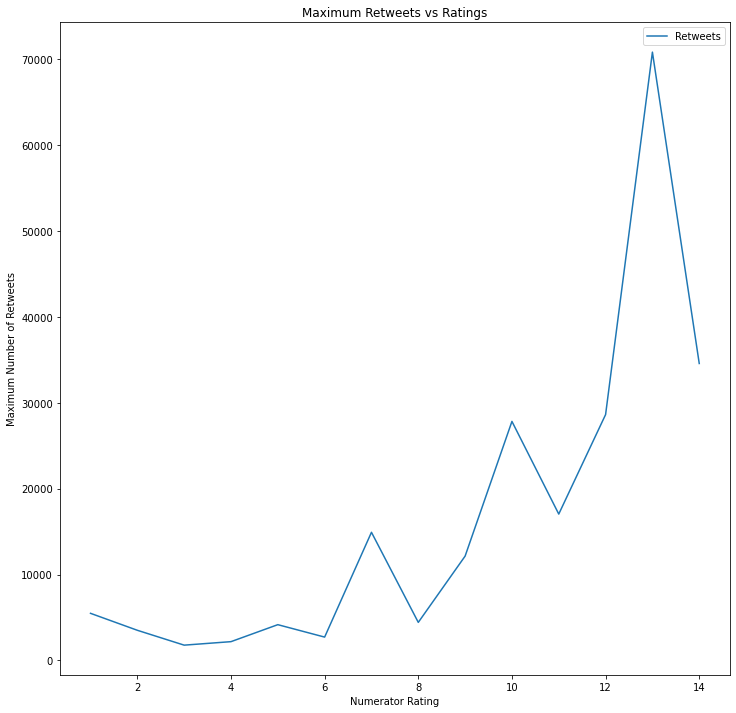

In [94]:
# A look at this graphically
enhanced_clean.groupby('rating_numerator')['retweet_count'].max().plot(kind = 'line', figsize = (12, 12), label = 'Retweets')
plt.xlabel('Numerator Rating')
plt.ylabel('Maximum Number of Retweets')
plt.title('Maximum Retweets vs Ratings')
plt.legend();

> The maximum number of retweets is from the rating 13/10. It has 70,855 retweets. It is not the highest rating in the present dataset, the highest is 14/10. The higher the rating, the more the retweets tend to increase.

##### <font color = 'black'>*b.  What about the most liked images, do they also have the highest ratings?*</font>
***

In [95]:
# This shows the maximum favorite (likes) count for each numerator rating
enhanced_clean.groupby('rating_numerator')['favorite_count'].max()

rating_numerator
1.0      12916
2.0       5004
3.0       6004
4.0       4511
5.0       9894
6.0      15064
7.0      33874
8.0      11642
9.0      32634
10.0     71060
11.0     33158
12.0     80677
13.0    145051
14.0     82781
Name: favorite_count, dtype: int64

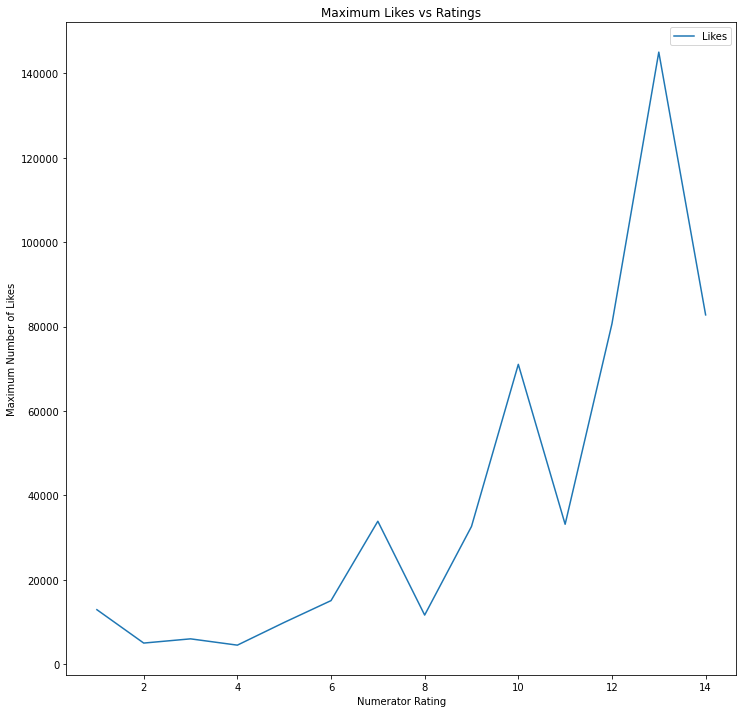

In [96]:
# A look at this graphically
enhanced_clean.groupby('rating_numerator')['favorite_count'].max().plot(kind = 'line', figsize = (12, 12), label = 'Likes')
plt.xlabel('Numerator Rating')
plt.ylabel('Maximum Number of Likes')
plt.title('Maximum Likes vs Ratings')
plt.legend();

> It also appears that at a rating of 13/10, the most likes were attained at 145,051. This means that both the retweet and favorite counts are at their highest at 13/10.

#####  <font color = 'black'>*c. What is the relationship between likes and retweets in 1. a. and 1. b. instances?*</font>
***

To know how the ratings and retweets fare against each other, I am going to plot them against each other below. But first I will need to assign each plot a variable.

In [97]:
max_retweets = enhanced_clean.groupby('rating_numerator')['retweet_count'].max()

In [98]:
max_favorites = enhanced_clean.groupby('rating_numerator')['favorite_count'].max()

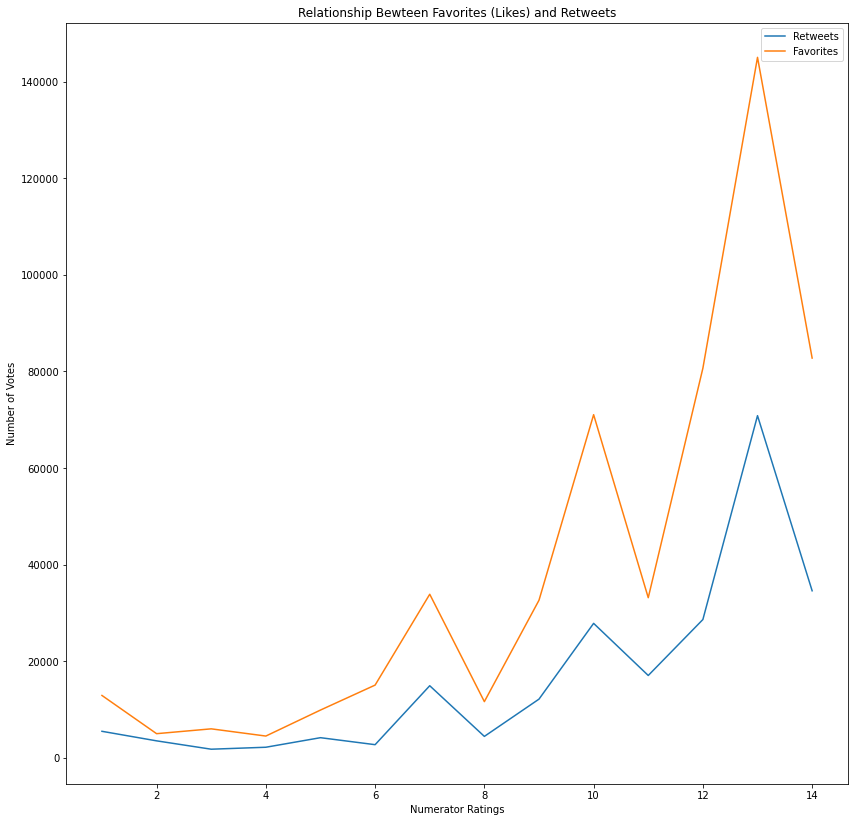

In [99]:
enhanced_clean.set_index('rating_numerator')
max_retweets.plot(legend = True, figsize = (14, 14), label = 'Retweets')
max_favorites.plot(legend = True, figsize = (14, 14), label = 'Favorites')

plt.xlabel('Numerator Ratings')
plt.ylabel('Number of Votes')
plt.title('Relationship Bewteen Favorites (Likes) and Retweets')
plt.legend();

> From the above graph they increase almost proportionally. To see exactly how, have a look at the graph below.

> Also there are more likes than retweets. 

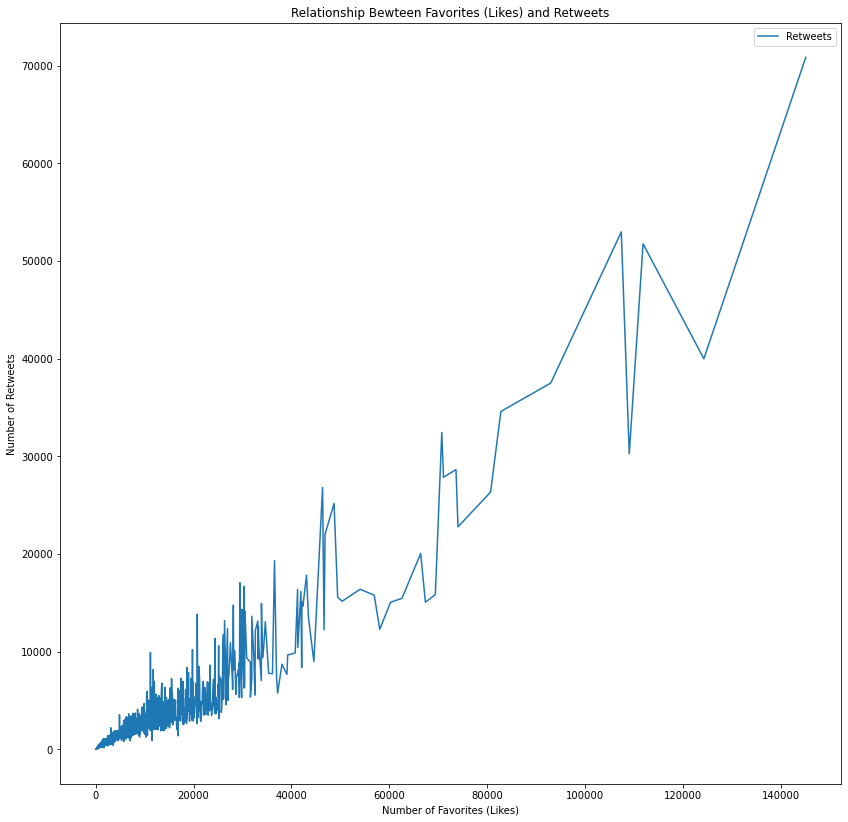

In [100]:
# To check entry by entry the relationship between the retweets and likes
enhanced_clean[enhanced_clean['rating_numerator'] == enhanced_clean['rating_numerator']].groupby('favorite_count')['retweet_count'].max().plot(legend = True, figsize = (14, 14), label = 'Retweets')
plt.xlabel('Number of Favorites (Likes)')
plt.ylabel('Number of Retweets')
plt.title('Relationship Bewteen Favorites (Likes) and Retweets')
plt.legend();

***
##### <font color = 'black'>*2. What is the most frequent dog age (where available)? How many retweets does it get compared to the least frequent dog age?*</font>
***

In [101]:
# I will be computing the most frequent dog age and ignoring those without any age
enhanced_clean['dog_ages'].value_counts()

pupper            200
doggo              63
puppo              22
pupper, doggo       8
floofer             7
doggo, floofer      1
puppo, doggo        1
Name: dog_ages, dtype: int64

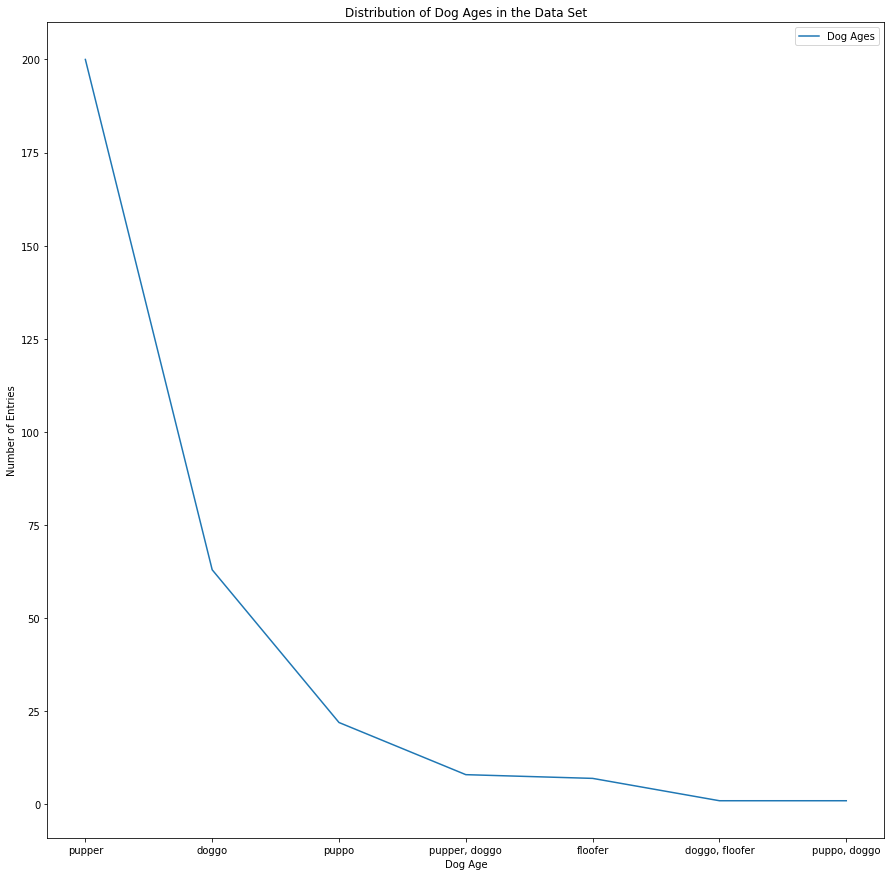

In [102]:
# We can see the above graphically, to ignore those without ages I have excluded the unknown dog ages by slicing
enhanced_clean['dog_ages'].value_counts().plot(figsize = (15, 15), label = 'Dog Ages')
plt.xlabel('Dog Age')
plt.ylabel('Number of Entries')
plt.title('Distribution of Dog Ages in the Data Set')
plt.legend();

##### For the available data
> The most frequent dog age is the pupper.</font>

> The least frequent is the tie in doggo, floofer and puppo, doggo.</font>

> I wil now check their retweets.</font>

In [131]:
# To find out the sum of retweets for each known dog age
enhanced_clean.groupby('dog_ages')['retweet_count'].sum().sort_values()

dog_ages
doggo, floofer      2801
puppo, doggo       16156
floofer            27951
pupper, doggo      29850
puppo             117345
doggo             370917
pupper            386043
Name: retweet_count, dtype: int64

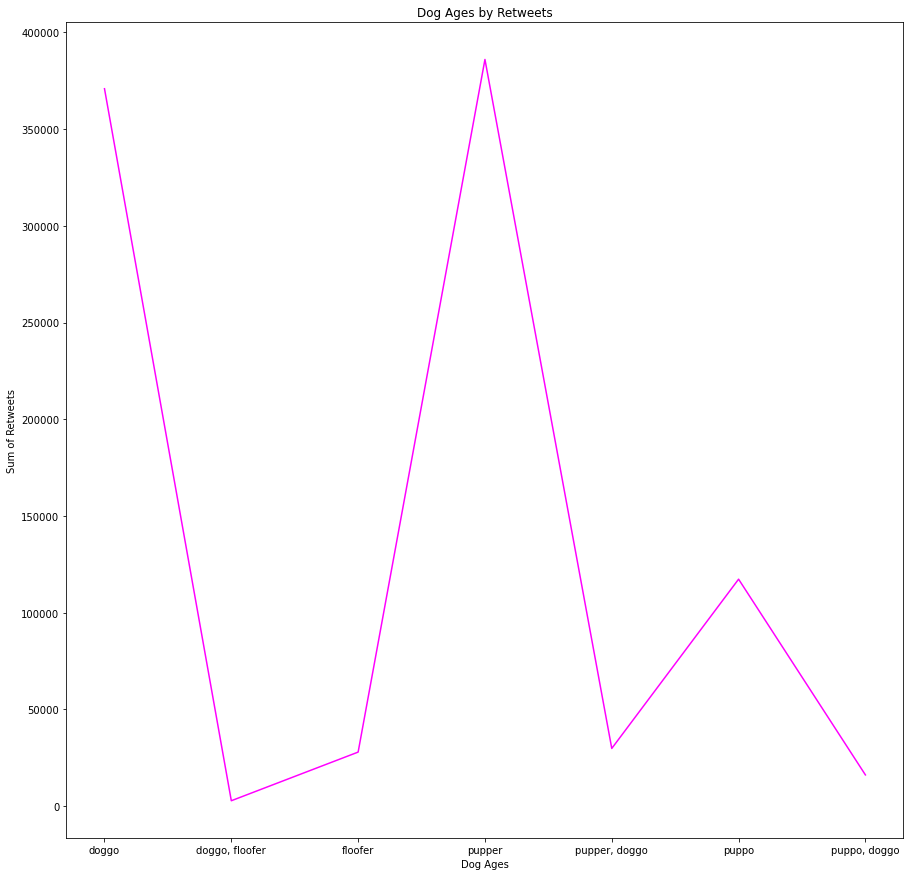

In [104]:
# The above can be seen graphically, with the unknown dog ages excluded, as:
fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.lineplot(data =enhanced_clean.groupby('dog_ages')['retweet_count'].sum(), color = 'magenta');
ax.set_title('Dog Ages by Retweets')
ax.set_xlabel('Dog Ages')
ax.set_ylabel('Sum of Retweets')
plt.show();

> The puppers have 386,043 total retweets. That is the most number of retweets. There were 200  known puppers in the dataset.

> The doggo, floofers have 2801 retweets. That is the least number of retweets. There was only 1 known doggo, floofer in the dataset.

In [105]:
# To get the percentage of puppers and floofers with respect to the dataset retweets

def age_perc(dog_age):
        if dog_age == "pupper":
            return print(((386043/932106)*100), ' percent of the total retweets went to the puppers. They are the most retweeted dog age.')
        else:
            if dog_age == "doggo, floofer":
                return print(((2801/932106)*100), 'percent of the total retweets for dog ages went to the floofers. They are the least retweeted dog age.')
# enhanced_clout['dog_age'].count()

In [106]:
age_perc("pupper")

41.416212319199744  percent of the total retweets went to the puppers. They are the most retweeted dog age.


In [107]:
age_perc("doggo, floofer")

0.30050230338609557 percent of the total retweets for dog ages went to the floofers. They are the least retweeted dog age.


***
##### <font color = 'black'>*3. Which are the overall most liked dog ages (where available)?*</font>
***

In [132]:
# I am looking fot total likes for each dog stage
enhanced_clean.groupby('dog_ages')['favorite_count'].sum().sort_values()

dog_ages
doggo, floofer      14859
puppo, doggo        41943
floofer             78645
pupper, doggo      101815
puppo              431010
doggo             1092448
pupper            1251601
Name: favorite_count, dtype: int64

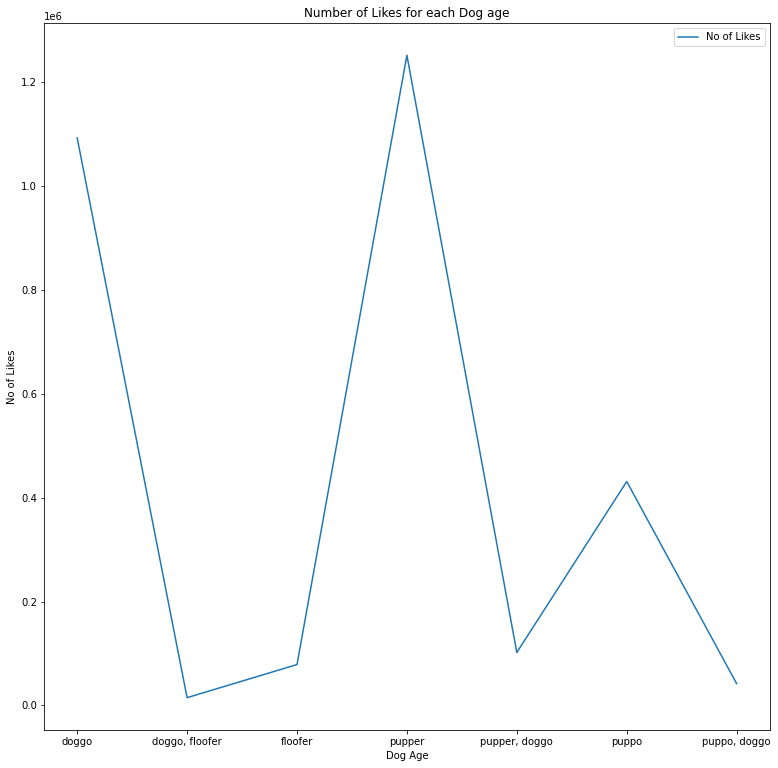

In [109]:
enhanced_clean.groupby('dog_ages')['favorite_count'].sum().plot(legend = True, label = 'No of Likes', figsize = (13, 13))
plt.xlabel('Dog Age')
plt.ylabel('No of Likes')
plt.title('Number of Likes for each Dog age')
plt.legend();

> The most liked dogs happen to be puppers, with 145,051 likes.</font>

***
##### <font color = 'black'>*4. What is the most common dog breed, and how does it fare in terms of likes and retweets?*</font> 
***

##### In the first prediction:

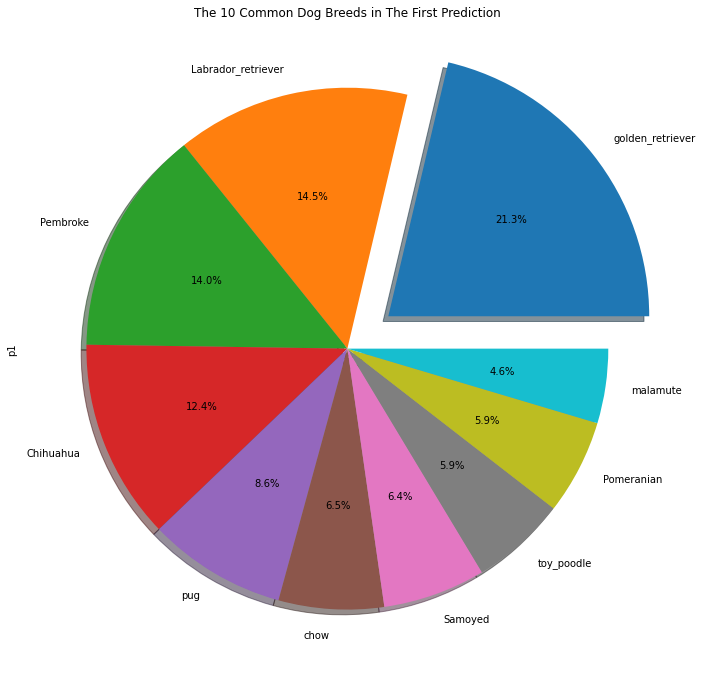

In [110]:
# The top 10 common dog breed entries in the first prediction
enhanced_clean['p1'].value_counts(normalize = True)[:10].plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0], figsize = (12, 12))
plt.title('The 10 Common Dog Breeds in The First Prediction');

In [111]:
# Its maximum retweet count
enhanced_clean.query('p1 == "golden_retriever"').groupby('p1')['retweet_count'].max()

p1
golden_retriever    22773
Name: retweet_count, dtype: int64

In [112]:
# Its maximum favorite count 
enhanced_clean.query('p1 == "golden_retriever"').groupby('p1')['favorite_count'].max()

p1
golden_retriever    74019
Name: favorite_count, dtype: int64

In [113]:
enhanced_clean['p1'].value_counts()

golden_retriever      134
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
EntleBucher             1
earthstar               1
pillow                  1
lorikeet                1
orange                  1
Name: p1, Length: 371, dtype: int64

>The most popular dog in the first prediction is the golden retriever with 135 counts. Its highest like on an entry with 74, 019 likes and  the highest retweet among its entries was 22, 773 retweets.

##### In the second prediction:

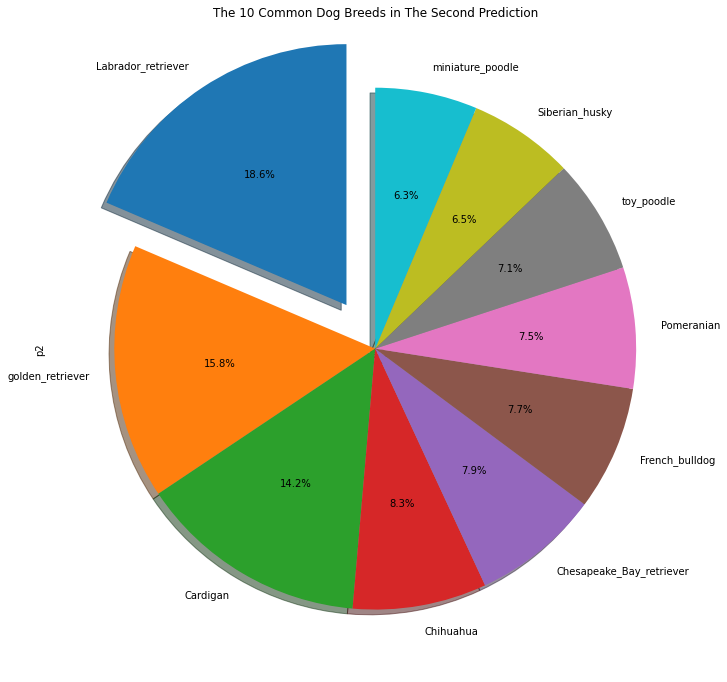

In [114]:
# The top 10 dpg breeds in the second prediction
enhanced_clean['p2'].value_counts(normalize = True)[:10].plot(kind = 'pie', startangle = 90.0, autopct = '%1.1f%%', explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0], shadow = True, figsize = (12, 12))
plt.title('The 10 Common Dog Breeds in The Second Prediction');

In [115]:
# Its maximum retweet count
enhanced_clean.query('p2 == "Labrador_retriever"').groupby('p2')['retweet_count'].max()

p2
Labrador_retriever    39988
Name: retweet_count, dtype: int64

In [116]:
# Its maximum favorite count 
enhanced_clean.query('p2 == "Labrador_retriever"').groupby('p2')['favorite_count'].max()

p2
Labrador_retriever    124236
Name: favorite_count, dtype: int64

In [117]:
enhanced_clean['p2'].value_counts()

Labrador_retriever          94
golden_retriever            80
Cardigan                    72
Chihuahua                   42
Chesapeake_Bay_retriever    40
                            ..
trench_coat                  1
junco                        1
snowmobile                   1
streetcar                    1
bagel                        1
Name: p2, Length: 394, dtype: int64

> The most popular dog in the second prediction is the labrador retriever with 94 counts. It had the highest like on an entry with 124, 236 likes and the highest retweet among its entries was 39, 988 retweets.

##### In the third prediction:

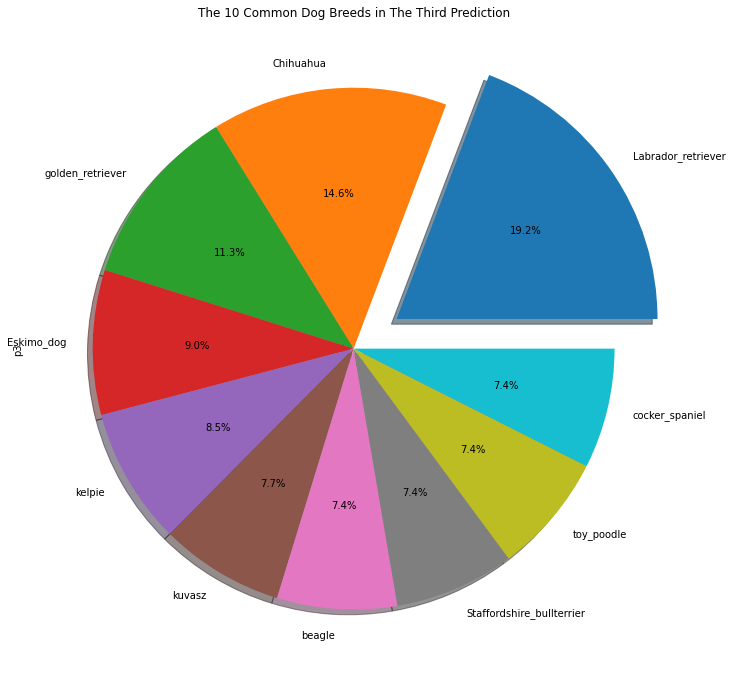

In [118]:
# The top 10 dog breeds in the third prediction
enhanced_clean['p3'].value_counts(normalize = True)[:10].plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],  figsize = (12, 12))
plt.title('The 10 Common Dog Breeds in The Third Prediction');

In [119]:
# Its maximum retweet count
enhanced_clean.query('p3 == "Labrador_retriever"').groupby('p3')['retweet_count'].max()

p3
Labrador_retriever    22773
Name: retweet_count, dtype: int64

In [120]:
# Its maximum favorite count 
enhanced_clean.query('p3 == "Labrador_retriever"').groupby('p3')['favorite_count'].max()

p3
Labrador_retriever    74019
Name: favorite_count, dtype: int64

In [121]:
enhanced_clean['p3'].value_counts()

Labrador_retriever    75
Chihuahua             57
golden_retriever      44
Eskimo_dog            35
kelpie                33
                      ..
pot                    1
toyshop                1
cliff                  1
loupe                  1
banana                 1
Name: p3, Length: 401, dtype: int64

> The most popular dog in the third prediction is the labrador retriever with 75 counts. It had the highest like on an entry with 74,019 likes and the highest retweet among its entries was 22,773 retweets.</font>

#####  The most popular dog breed from all predictions is the retriever: the golden retriever and the labrador retriever.

***
##### <font color = 'black'>_4. Given the prediction confidence, what was the true accuracy of the various prediction columns?_</font> 
***

##### In the first prediction: 

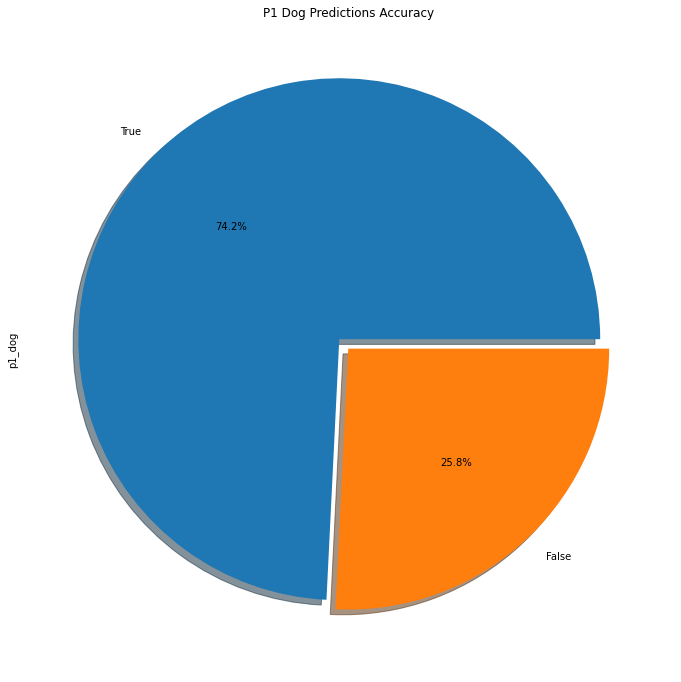

In [122]:
# To get the percentage of the true and  false values in the first prediction, I will use the normalize argument in value counts
enhanced_clean['p1_dog'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, figsize = (12, 12), explode = [0.05, 0])
plt.title('P1 Dog Predictions Accuracy');

> The above shows that in the first prediction the neural network was approximately 74.2% correct and 25.8% wrong. That means that around 1 in every 4 predictions is likely to be wrong.

##### In the second prediction:

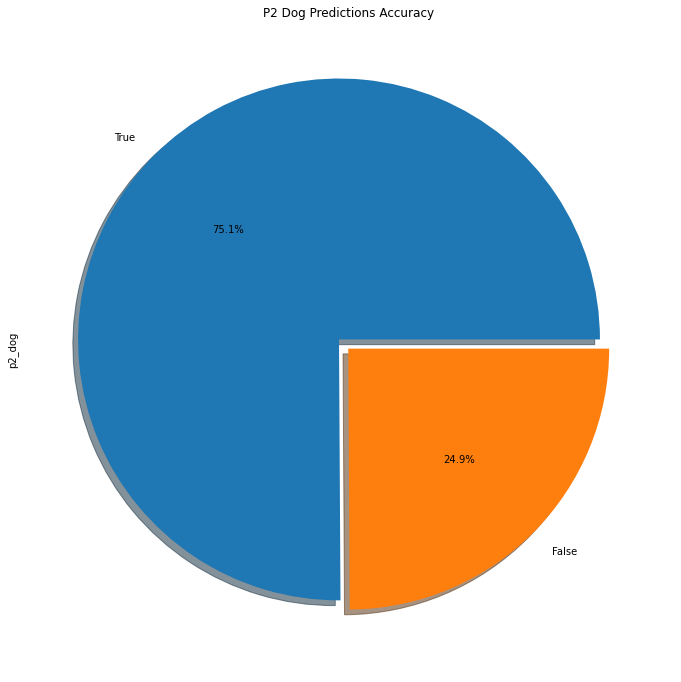

In [123]:
# To get the percentage of the true and  false values in the second prediction, I will use the normalize argument in value counts 
enhanced_clean['p2_dog'].value_counts(normalize = True)
enhanced_clean['p2_dog'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, figsize = (12, 12), explode = [0.05, 0])
plt.title('P2 Dog Predictions Accuracy');

> The above shows that in the second prediction the neural network was approximately 75.1% correct and 24.9% wrong. That means that around 1 in every 4 predictions is likely to be wrong.

##### In the third prediction:

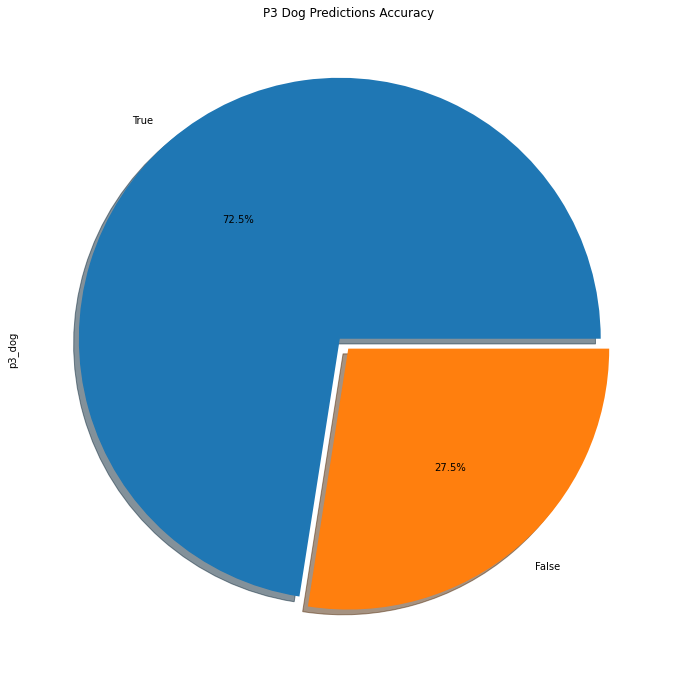

In [124]:
# To get the percentage of the true and  false values in the second prediction, I will use the normalize argument in value counts 
enhanced_clean['p3_dog'].value_counts(normalize = True)
enhanced_clean['p3_dog'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, figsize = (12, 12), explode = [0.05, 0])
plt.title('P3 Dog Predictions Accuracy'); 


> The above shows that in the third prediction the neural network was approximately 72.5% correct and 27.5% wrong. That means that around 1 in every 4 predictions is likely to be wrong.

***
##### <font color = 'black'>_5. How confident on a whole has the Convoluted Neural Network been about predictions each time it was faced with the same image?_</font>
***

In [125]:
enhanced_clean['tota_conf'] = (enhanced_clean['p1_conf'] + enhanced_clean['p2_conf'] + enhanced_clean['p3_conf'])/3

In [126]:
enhanced_clean.tota_conf.mean()*100

26.304532669967923

In [127]:
enhanced_clean.p1_conf.mean()*100

59.384955863659705

In [128]:
enhanced_clean.p2_conf.mean()*100

13.509062469216454

In [129]:
enhanced_clean.p3_conf.mean()*100

6.019579677027723

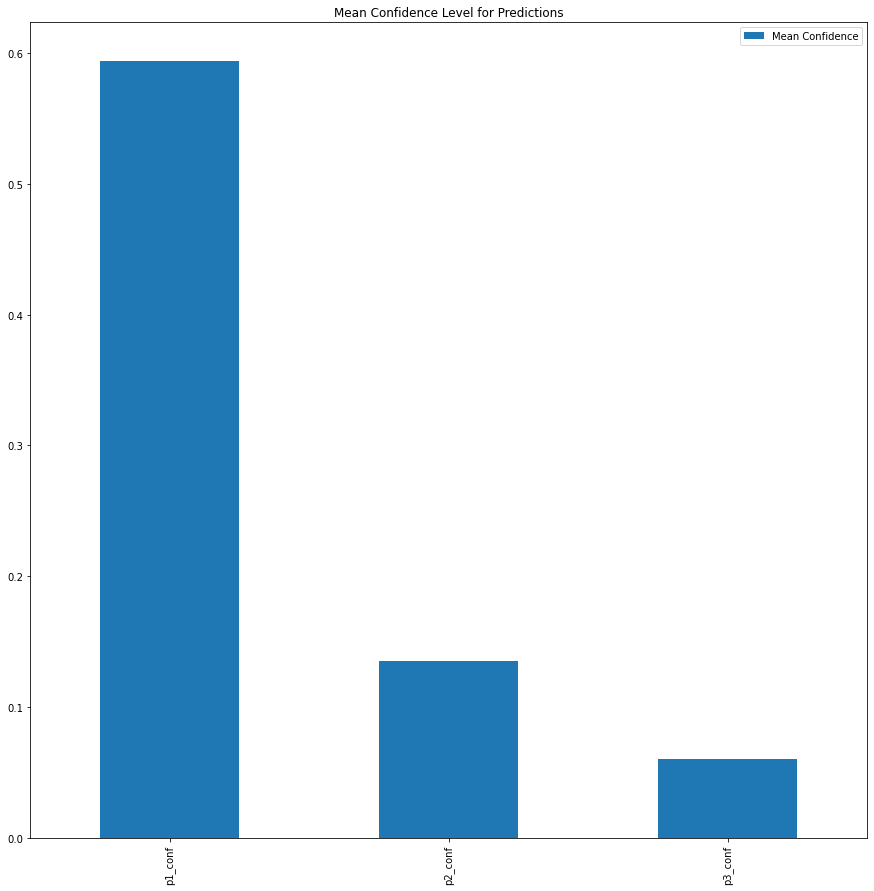

In [130]:
enhanced_clean[['p1_conf', 'p2_conf', 'p3_conf']].mean().plot(kind = 'bar', label = 'Mean Confidence', figsize = (15, 15))
plt.title('Mean Confidence Level for Predictions')
plt.legend();

> ##### The first prediction has the highest mean prediction confidence as a whole. It has a  59.38% confidence rating.
> ###### The second prediction has a lower mean prediction confidence with a 13.51% confidence rating.
> ##### The third prediction has the lowest mean prediction confidence with a 6.02% confidence rating.
##### The average of the entire  confidence ratings stands at 26.03%.

##### The most confident ratings come from the first prediction.

In [ ]:
# Primarily because I do not know how to modify it and nobody answers on Slack and it was neever part of my investigation
# Because nobody answers it, I cannot hinge my project timing on when anyone will answer me
# Resources online do not answer for everything because we do not all think alike
# Or maybe you can show me how to do it in the next review suggestion? I would appreciate that. I don't get enough help on any project